In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn import svm
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse
import seaborn as sns
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error


In [2]:
df=pd.read_csv("CO2_a_clean.csv")

In [3]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,Z,11.9,7.7,10.0,28.0,230.0
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28.0,232.0
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.8,9.0,11.1,25.0,255.0
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24.0,267.0
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,Z,10.6,7.5,9.2,31.0,212.0


In [4]:
df['CO2 Emissions(g/km)'].max()

522.0

In [5]:
df['CO2 Emissions(g/km)'].min()

96.0

NameError: name 'stats' is not defined

<Figure size 200x100 with 0 Axes>

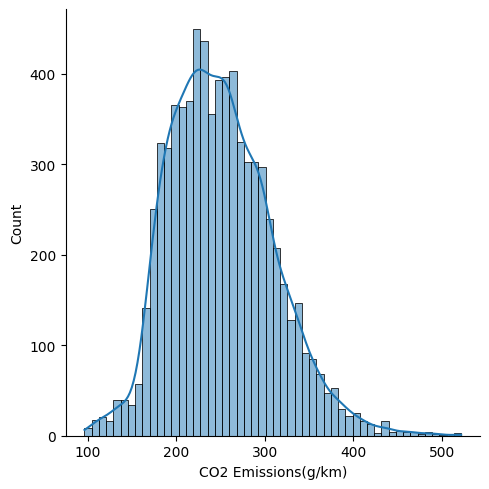

<Figure size 640x480 with 0 Axes>

In [6]:
from scipy.stats import norm
plt.figure(figsize=(2, 1))
sns.displot(df['CO2 Emissions(g/km)'], kde=True)
fig = plt.figure()
res = stats.probplot(df['CO2 Emissions(g/km)'], plot=plt)

NameError: name 'stats' is not defined

<Figure size 200x100 with 0 Axes>

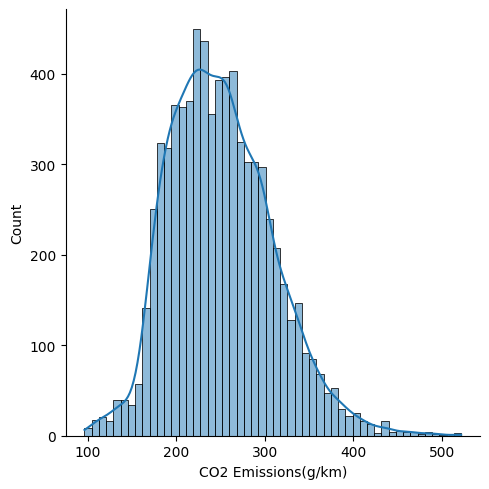

<Figure size 640x480 with 0 Axes>

In [7]:
#histogram and normal probability plot
from scipy.stats import norm
plt.figure(figsize=(2, 1))
sns.displot(df['CO2 Emissions(g/km)'], kde=True)
fig = plt.figure()
res = stats.probplot(df['CO2 Emissions(g/km)'], plot=plt)

<Axes: >

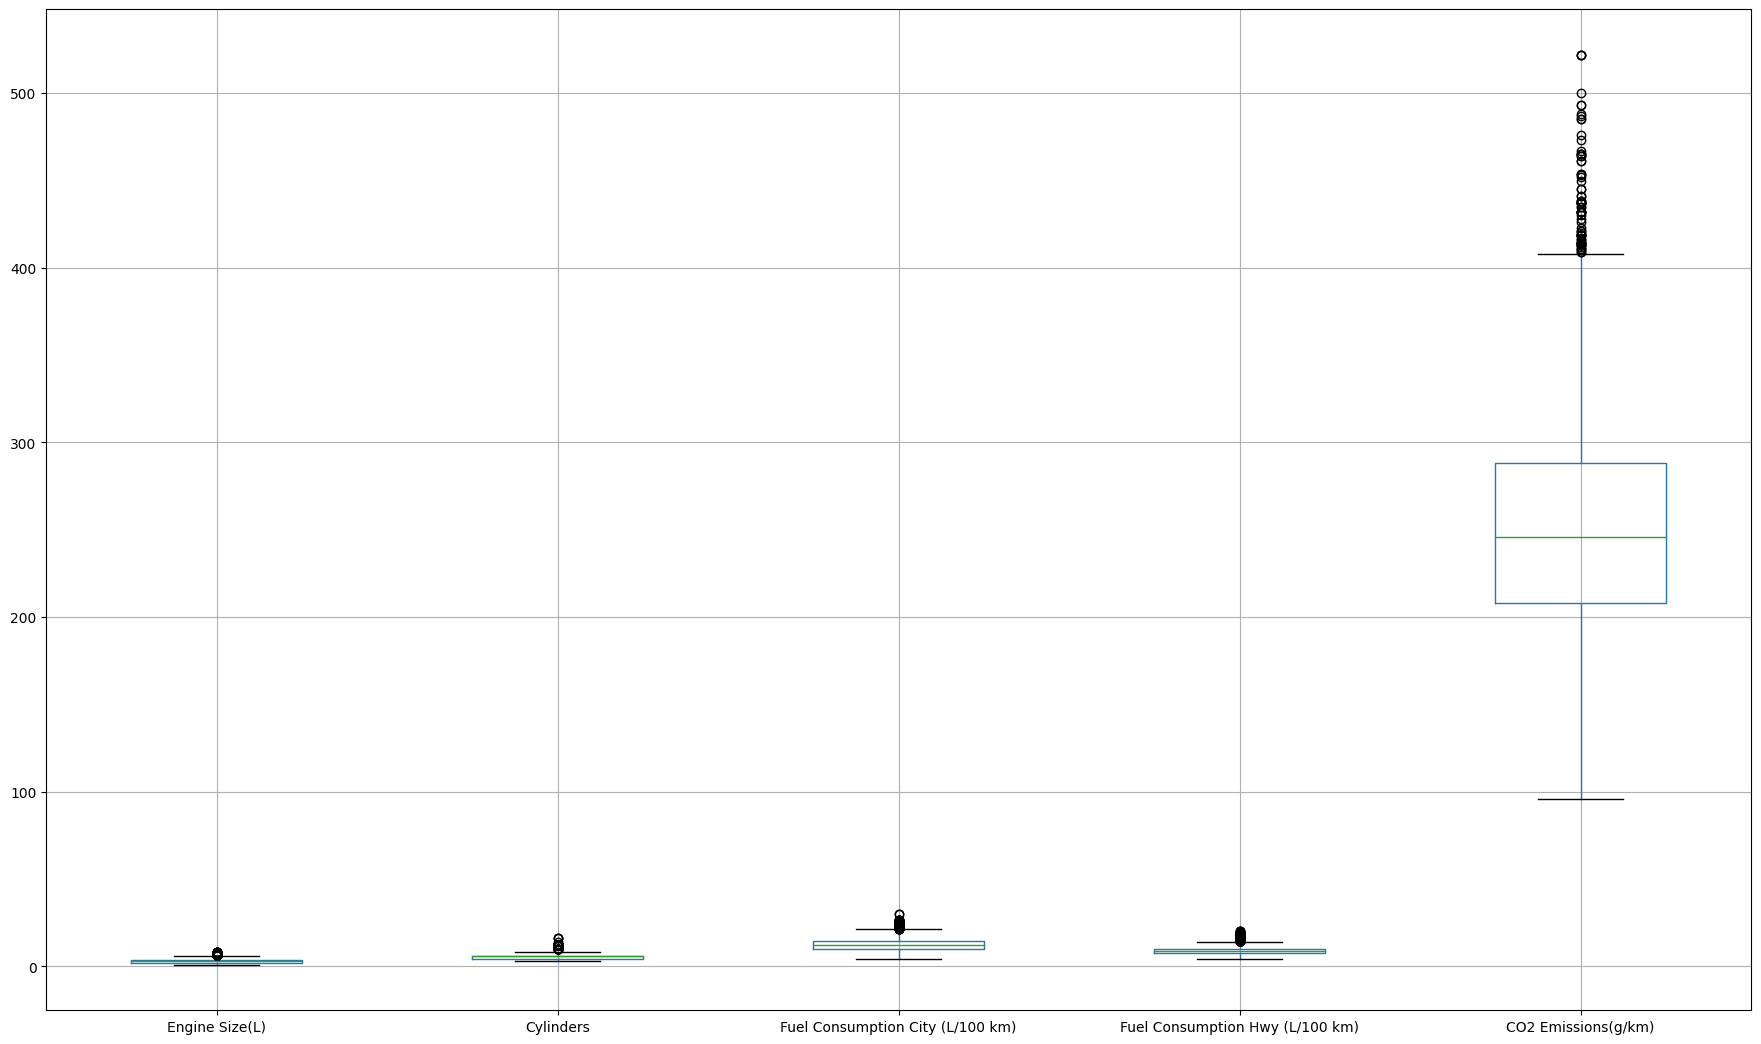

In [8]:
z = df.drop('Fuel Consumption Comb (L/100 km)',axis =1)
b= z.drop('Fuel Consumption Comb (mpg)',axis =1)
plt.figure(figsize=(22, 13))
b.boxplot()

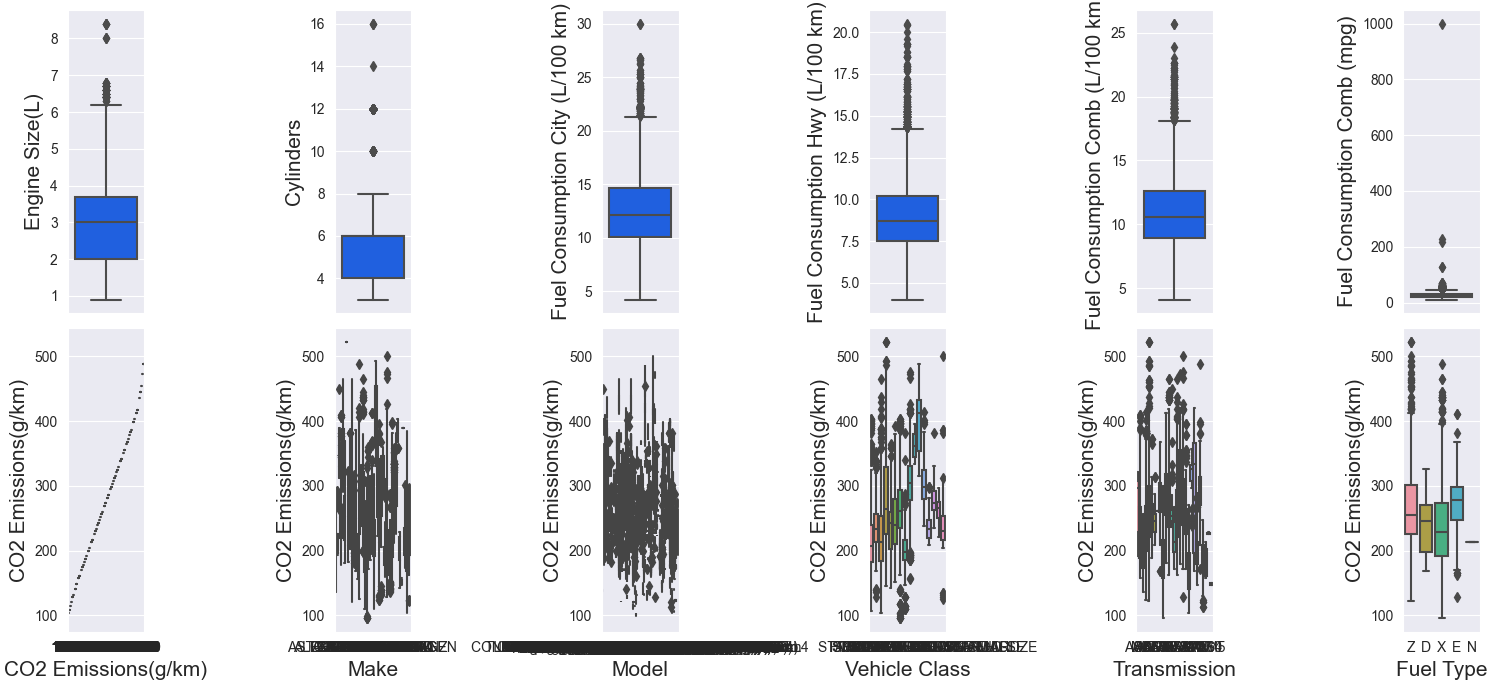

In [9]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

# Defining the order of columns for plotting
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, df.select_dtypes(include='object').columns.values])

# Creating subplots for box plots
fig, ax = plt.subplots(2, 6, figsize=(15, 7), dpi=100)  # Adjust the number of columns to match your dataset

# Looping through columns for plotting
for i, col in enumerate(OrderedCols):
    x = i // 6
    y = i % 6
    if i < 6:  # Adjust this condition based on the number of numeric columns
        sns.boxplot(data=df, y=col, ax=ax[x, y])
        ax[x, y].yaxis.label.set_size(15)
    else:
        sns.boxplot(data=df, x=col, y='CO2 Emissions(g/km)', ax=ax[x, y])
        ax[x, y].xaxis.label.set_size(15)
        ax[x, y].yaxis.label.set_size(15)

# Adjusting the layout for better visualization
plt.tight_layout()
plt.show()

In [10]:
negative_samples = []

for col in df.select_dtypes(exclude='object').columns:
    negative_samples_in_col = df[df[col] < 0]
    negative_samples.append(negative_samples_in_col)

# Concatenate the list of DataFrames into a single DataFrame
if negative_samples:
    negative_samples = pd.concat(negative_samples)

# Display the rows with negative values
negative_samples

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [35]:
# from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 70))

# Assuming 'data' is your dataset and 'column' is the column you want to scale
# You need to reshape the column to a 2D array before scaling
column_to_scale = df['CO2 Emissions(g/km)'].values.reshape(-1, 1)

# Fit and transform the column using the scaler
scaled_column = scaler.fit_transform(column_to_scale)

# Replace the original column in the dataset with the scaled values
df['CO2 Emissions(g/km)'] = scaled_column

df['CO2 Emissions(g/km)']

0       16.431925
1       20.539906
2        6.572770
3       26.126761
4       24.319249
          ...    
7402    20.211268
7403    22.347418
7404    23.661972
7405    22.347418
7406    24.976526
Name: CO2 Emissions(g/km), Length: 7407, dtype: float64

In [12]:
x = df.drop(['CO2 Emissions(g/km)', 'Model' , 'Vehicle Class'], axis=1)

In [13]:
# List of categorical column names
categorical_columns = ['Make', 'Transmission', 'Fuel Type']

# Use Pandas get_dummies to one-hot encode the categorical columns
x = pd.get_dummies(x, columns=categorical_columns)

# Now, all the specified categorical columns are one-hot encoded
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4.0,9.9,6.7,8.5,33.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4.0,11.2,7.7,9.6,29.0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1.5,4.0,6.0,5.8,5.9,48.0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,3.5,6.0,12.7,9.1,11.1,25.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6.0,12.1,8.7,10.6,27.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7402,2.0,4.0,10.7,7.7,9.4,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7403,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7404,2.0,4.0,11.7,8.6,10.3,27.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7405,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
y = df[['CO2 Emissions(g/km)']]
y

,CO2 Emissions(g/km)
0,16.431925
1,20.539906
2,6.572770
3,26.126761
4,24.319249
...,...
7402,20.211268
7403,22.347418
7404,23.661972
7405,22.347418


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [16]:
X_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
5420,4.0,8.0,14.1,8.9,11.8,24.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1223,2.0,4.0,10.8,7.9,9.5,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
210,2.0,4.0,9.9,7.6,8.9,32.0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3931,2.0,4.0,10.7,8.8,9.8,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6312,2.5,4.0,12.3,9.4,11.0,26.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,3.5,6.0,11.1,8.1,9.8,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5226,3.0,6.0,12.0,8.5,10.4,27.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5390,3.0,6.0,12.4,8.9,10.8,26.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,4.4,8.0,16.2,10.9,13.8,20.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [17]:
X_train.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI', 'Make_BENTLEY', 'Make_BMW',
       'Make_BUGATTI', 'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET',
       'Make_CHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_FORD', 'Make_GENESIS',
       'Make_GMC', 'Make_HONDA', 'Make_HYUNDAI', 'Make_INFINITI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KIA', 'Make_LAMBORGHINI',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_LINCOLN', 'Make_MASERATI',
       'Make_MAZDA', 'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI',
       'Make_NISSAN', 'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE',
       'Make_SCION', 'Make_SMART', 'Make_SRT', 'Make_SUBARU', 'Make_TOYOTA',
       'Make_VOLKSWAGEN', 'Make_VOLVO', 'Transmission_A10', 'Transmission_A4',
       'Transmission_A5', 'Transmission_A6', 'Tra

In [18]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,16.431925
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,20.539906
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,6.572770
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,26.126761
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,24.319249


In [19]:
y_train

,CO2 Emissions(g/km)
5420,29.413146
1223,20.704225
210,17.910798
3931,21.525822
6312,26.455399
...,...
5191,21.197183
5226,24.319249
5390,26.126761
860,37.464789


In [20]:
y_test_actual = y_test

In [21]:
regressor = svm.SVR(kernel='linear')  # Linear SVM regression, for example

# Train the regression model
regressor.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [22]:
regressor.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
regressor.score(X_train, y_train)

0.9896257797687433

In [25]:
regressor.score(X_test, y_test)

0.9911483867360534

In [26]:
mse = mean_squared_error(y_test, y_pred)

In [27]:
print(mse)

0.7837388539102321


In [28]:
def model_evaluation(model, X_test, y_test, model_name):
    # Use the 'model' to make predictions on the test dataset 'X_test'.
    y_pred = model.predict(X_test)
    
    # Calculate various regression metrics:
    # 1. Mean Absolute Error (MAE)
    MAE =  mean_absolute_error(y_test, y_pred)
    # 2. Mean Squared Error (MSE)
    MSE = mean_squared_error(y_test, y_pred)
    # 3. Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)
    # 4. R-squared Score (R2-Score)
    R2_Score =r2_score(y_test, y_pred)
    
    # Create a DataFrame with the calculated metrics, using 'model_name' as the column label.
    result_df = pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])
    
    # Return the DataFrame containing the metrics.
    return result_df

# Call the 'model_evaluation' function with the specified model, test data, and model name.
model_evaluation(regressor, X_train, y_train, 'Support vector mchine')

,Support vector mchine
MAE,0.440169
MSE,0.968643
RMSE,0.984197
R2-Score,0.989626


In [26]:
# Use the 'model' to make predictions on the 'X_train' dataset.
y_train_pred = regressor.predict(X_train)

# Create a DataFrame 'ytest_ored' with a single column named 'y_test_pred' to store the predictions.
ytrain_pred = pd.DataFrame({'y_test_pred': y_train_pred})

# Display the 'ytest_ored' DataFrame, showing the predicted values.
ytrain_pred


,y_test_pred
0,29.406929
1,20.681987
2,18.044815
3,22.114135
4,26.198625
...,...
5920,21.367286
5921,23.906893
5922,25.828584
5923,37.000652


In [27]:
y_predict = regressor.predict(X_test)

# Create a DataFrame 'predict_df' with a single column named 'Predicted' to store the predictions.
predict_df = pd.DataFrame({'Predicted': y_predict})

# Display the 'predict_df' DataFrame, showing the predicted values.
predict_df

,Predicted
0,25.742579
1,46.224303
2,21.993418
3,33.583401
4,16.546037
...,...
1477,17.436210
1478,15.756643
1479,31.673607
1480,21.795682


In [28]:
# Reset the index of the 'y_test_actual' DataFrame and modify it in place.
y_test_actual.reset_index(drop=True, inplace=True)

# Concatenate 'y_test_actual' and 'predict_df' DataFrames along the columns (axis=1).
prediction_result = pd.concat([y_test_actual, predict_df], axis=1)

# Display the resulting 'prediction_result' DataFrame.
prediction_result


,CO2 Emissions(g/km),Predicted
0,25.962441,25.742579
1,45.516432,46.224303
2,21.690141,21.993418
3,34.014085,33.583401
4,15.938967,16.546037
...,...,...
1477,20.046948,17.436210
1478,16.103286,15.756643
1479,31.549296,31.673607
1480,21.197183,21.795682


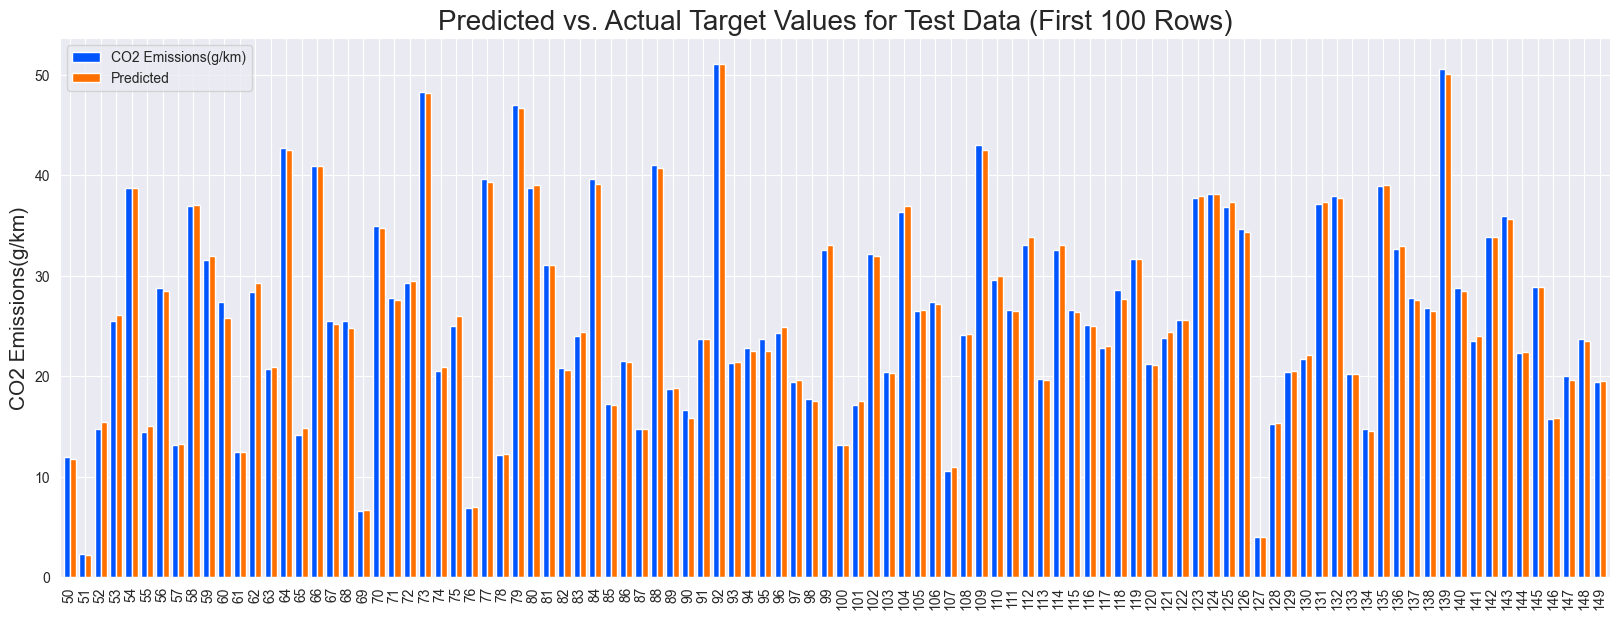

In [29]:
def compare_plot(df_comp):
    #df_comp.reset_index(inplace=True)
    df_comp_first_100 = df_comp.iloc[50:150]  # Slice the DataFrame to include only the first 100 rows
    df_comp_first_100.plot(y=['CO2 Emissions(g/km)', 'Predicted'], kind='bar', figsize=(20, 7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data (First 100 Rows)', fontsize=20)
    plt.ylabel('CO2 Emissions(g/km)', fontsize=15)
    plt.show()

compare_plot(prediction_result)

In [30]:
# Assuming you've already trained your model and made predictions
normalized_predictions = regressor.predict(X_test)

# Denormalize the predictions using the scaler's parameters
denormalized_predictions = scaler.inverse_transform(normalized_predictions.reshape(-1, 1))

# 'denormalized_predictions' now contains the actual predicted values in the original scale

In [31]:
denormalized_predictions
prediction_one_dim_list = [element for row in denormalized_predictions for element in row]
denormalized_predictions_df=pd.DataFrame({'denormalized_predictions': prediction_one_dim_list})
denormalized_predictions_df

,denormalized_predictions
0,252.661983
1,377.307901
2,229.845658
3,300.378985
4,196.694455
...,...
1477,202.111791
1478,191.890425
1479,288.756522
1480,228.642291


In [32]:
denormalized_actual_val = scaler.inverse_transform(y_test_actual)

In [33]:
actual_one_dim_list = [element for row in denormalized_actual_val for element in row]
denormalized_actual_val_df=pd.DataFrame({'denormalized_actual_val': actual_one_dim_list})
denormalized_actual_val_df

,denormalized_actual_val
0,254.0
1,373.0
2,228.0
3,303.0
4,193.0
...,...
1477,218.0
1478,194.0
1479,288.0
1480,225.0


In [34]:
denormalized_result = pd.concat([denormalized_predictions_df, denormalized_actual_val_df], axis=1)
denormalized_result.head(10)

,denormalized_predictions,denormalized_actual_val
0,252.661983,254.0
1,377.307901,373.0
2,229.845658,228.0
3,300.378985,303.0
4,196.694455,193.0
5,243.141768,243.0
6,217.201627,217.0
7,186.559396,187.0
8,255.215472,251.0
9,199.961259,201.0


In [49]:
categorical_columns = ['Make', 'Transmission', 'Fuel Type']

user_input= {
    'Make': ['ACURA'],  # Include both Make and Model
    'Engine Size(L)': [2.0],  # Update the Engine Size
    'Cylinders': [4.0],
    'Transmission': ['AS5'],  # Update the Transmission
    'Fuel Type': ['Z'],
    'Fuel Consumption City (L/100 km)': [9.9],
    'Fuel Consumption Hwy (L/100 km)': [6.7],  # Update fuel consumption values
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame(user_input)

# One-hot encode the categorical variables to match X_train columns
user_input_encoded = pd.get_dummies(user_input_df, columns=categorical_columns)

# Initialize the user input DataFrame with all zeros and columns from X_train
user_input_for_prediction = pd.DataFrame(0, index=[0], columns=X_train.columns)

# Fill in the columns that match based on user input
for col in user_input_encoded.columns:
    if col in user_input_for_prediction.columns:
        user_input_for_prediction.loc[0, col] = user_input_encoded[col].iloc[0]

# Calculate 'Fuel Consumption Comb (L/100 km)' based on 'Fuel Consumption City (L/100 km)' and 'Fuel Consumption Hwy (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (L/100 km)'] = (0.55 * user_input_for_prediction['Fuel Consumption City (L/100 km)'] +
                                                              0.45 * user_input_for_prediction['Fuel Consumption Hwy (L/100 km)'])

# Calculate 'Fuel Consumption Comb (mpg)' based on 'Fuel Consumption Comb (L/100 km)'
user_input_for_prediction['Fuel Consumption Comb (mpg)'] = 282.481/ user_input_for_prediction['Fuel Consumption Comb (L/100 km)']

# Make predictions
predictions = regressor.predict(user_input_for_prediction)

# The 'predictions' variable now contains the predicted values for the user input
print(predictions)

denormalized_userinput = scaler.inverse_transform(predictions.reshape(-1, 1))
print(denormalized_userinput)

[16.30193669]
[[16.30193669]]


In [47]:
X_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
5420,4.0,8.0,14.1,8.9,11.8,24.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1223,2.0,4.0,10.8,7.9,9.5,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
210,2.0,4.0,9.9,7.6,8.9,32.0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
3931,2.0,4.0,10.7,8.8,9.8,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6312,2.5,4.0,12.3,9.4,11.0,26.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,3.5,6.0,11.1,8.1,9.8,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5226,3.0,6.0,12.0,8.5,10.4,27.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5390,3.0,6.0,12.4,8.9,10.8,26.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,4.4,8.0,16.2,10.9,13.8,20.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [51]:
# Check for non-zero values in each column
non_zero_columns = user_input_for_prediction.columns[user_input_for_prediction.any()]

# Print the column names with non-zero values
print(non_zero_columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Model_ILX',
       'Vehicle Class_COMPACT', 'Transmission_AS5', 'Fuel Type_Z'],
      dtype='object')


In [ ]:
ACURA	ILX	COMPACT	2.0	4.0	AS5	Z	9.9	6.7	8.5	33.0	196.0

In [48]:
import pickle as pk
# Specify the file path where you want to save the model
model_filename = 'C:\\Users\\HP\\Desktop\\Prediction App\\svm_model.pkl'

# Use pickle to save the model to a file
with open(model_filename, 'wb') as model_file:
    pk.dump(regressor, model_file)

#FileLink(model_filename)

In [62]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Fit the MinMaxScaler to your data
scaler = MinMaxScaler()
scaler.fit(y)

# Serialize and save the fitted scaler to a file
joblib.dump(scaler, 'fitted_scaler.pkl')

['fitted_scaler.pkl']

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true is the true labels and y_pred is the predicted labels
confusion = confusion_matrix(denormalized_actual_val, denormalized_predictions)
accuracy = accuracy_score(denormalized_actual_val, denormalized_predictions)
precision = precision_score(denormalized_actual_val, denormalized_predictions)
recall = recall_score(denormalized_actual_val, denormalized_predictions)
f1 = f1_score(denormalized_actual_val, denormalized_predictions)

print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

ValueError: continuous is not supported